In [8]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv("C:/Users/nupur/OneDrive/Desktop/Mall_Customers.csv")

In [5]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [32]:
X = data.iloc[:,3:]

In [33]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


Text(0.5, 0, 'WCSS')

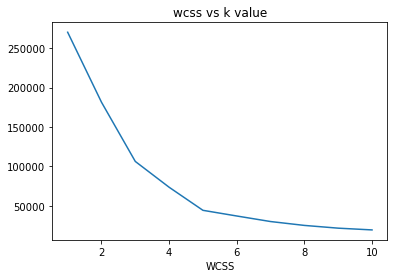

In [39]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("wcss vs k value")
plt.xlabel("Number of clusters")
plt.xlabel("WCSS")

In [40]:
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state=42)

In [45]:
y_means = kmeans.fit_predict(X)

In [46]:
print(y_means)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


In [57]:
test = kmeans.predict(np.asarray([[10,15]]))
test[0]

3

In [58]:
import pickle 
filename = "finalized_model.pickle"

In [59]:
pickle.dump(kmeans, open(filename, 'wb'))

In [61]:
X[y_means==0]

,Annual Income (k$),Spending Score (1-100)
1,15,81
3,16,77
5,17,76
7,18,94
9,19,72
11,19,99
13,20,77
15,20,79
17,21,66
19,23,98


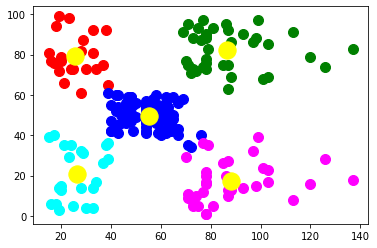

In [65]:
plt.scatter(X[y_means == 0]['Annual Income (k$)'], X[y_means == 0]['Spending Score (1-100)'], s = 100, c = 'red', label = 'Cluster1')
plt.scatter(X[y_means == 1]['Annual Income (k$)'], X[y_means == 1]['Spending Score (1-100)'], s = 100, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_means == 2]['Annual Income (k$)'], X[y_means == 2]['Spending Score (1-100)'], s = 100, c = 'green', label = 'Cluster3')
plt.scatter(X[y_means == 3]['Annual Income (k$)'], X[y_means == 3]['Spending Score (1-100)'], s = 100, c = 'cyan', label = 'Cluster4')
plt.scatter(X[y_means == 4]['Annual Income (k$)'], X[y_means == 4]['Spending Score (1-100)'], s = 100, c = 'magenta', label = 'Cluster5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.show()